This notebook is meant to explore the relationship between our transportation data and the CO2 emissions

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [95]:
transportation_df = pd.read_csv(".\data\Monthly_Transportation_Statistics.csv")

Extract the month and year from the datetime column and make new columns to hold those values 

In [96]:
transportation_df['Month'] = [int(datetime[0:2]) for datetime in transportation_df['Date']]
transportation_df['Year'] = [int(datetime[6:10]) for datetime in transportation_df['Date']]

In [97]:
transportation_df.tail()

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance,Transborder - U.S. - Canada Freight,Month,Year
880,880,05/01/2020 12:00:00 AM,22.0,NaN,NaN,"8,430,000","190,000","8,240,000","5,630,575","128,612,616",...,"9,488,000","190,000","2,709,000","8,240,000","56,068,942,704","25,367,164,296",0.890796,"30,701,778,408",5,2020
881,881,06/01/2020 12:00:00 AM,29.0,NaN,NaN,"16,489,999.999999998","400,000","16,090,000","7,069,441","159,137,385",...,"10,102,000","400,000","2,967,000","16,090,000","82,051,488,527.99998","41,591,152,333",NaN,"40,460,336,195",6,2020
882,882,07/01/2020 12:00:00 AM,55.0,NaN,NaN,NaN,NaN,NaN,"6,906,061","176,412,126",...,"11,023,000",NaN,"3,498,000",NaN,"90,959,108,077","47,536,726,155",NaN,"43,422,381,922",7,2020
883,883,08/01/2020 12:00:00 AM,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2020
884,884,09/01/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2020


In [98]:
#make a df with only the air transportation data 
air_transport_df = transportation_df[["Month", "Year", "U.S. Airline Traffic - Total - Seasonally Adjusted",  "U.S. Airline Traffic - International - Seasonally Adjusted", "U.S. Airline Traffic - Domestic - Seasonally Adjusted", "U.S. Airline Traffic - Total - Non Seasonally Adjusted","U.S. Airline Traffic - International - Non Seasonally Adjusted",  "U.S. Airline Traffic - Domestic - Non Seasonally Adjusted"]]

In [99]:
#Consider any NA values - for now, I am just going to fill the ones that are NAN with 0 in the columns I am looking at

air_transport_df = air_transport_df.rename(columns = {'U.S. Airline Traffic - International - Non Seasonally Adjusted' : 'airline_international'})
air_transport_df = air_transport_df.rename(columns = {'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted' : 'airline_domestic'})
air_transport_df['airline_domestic'] = air_transport_df['airline_domestic'].fillna(0)
air_transport_df['airline_international'] = air_transport_df['airline_international'].fillna(0)

#Let's just look at data since 2017
air_transport_recent = air_transport_df[air_transport_df["Year"] >= 2017]

Let's set the index to be the month and year combined

In [100]:
air_transport_recent.loc[:, "Month-Year"] = air_transport_recent.loc[:, "Month"].astype(str) + '-' + air_transport_recent.loc[:, "Year"].astype(str) 
air_transport_recent.set_index("Month-Year", inplace = True)

C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [121]:
#take out any commas in the data
air_transport_recent.loc[:, 'airline_international'] = air_transport_recent.loc[:, 'airline_international'].astype(str)
air_transport_recent.loc[:, 'airline_international'] = [s.replace(',','') for s in air_transport_recent.loc[:, 'airline_international']]
air_transport_recent.loc[:, 'airline_international'] = air_transport_recent.loc[:, 'airline_international'].astype(float)

air_transport_recent.loc[:, 'airline_domestic'] = air_transport_recent.loc[:,'airline_domestic'].astype(str)
air_transport_recent.loc[:, 'airline_domestic'] = [s.replace(',','') for s in air_transport_recent.loc[:, 'airline_domestic']]
air_transport_recent.loc[:, 'airline_domestic'] = air_transport_recent.loc[:,'airline_domestic'].astype(float)


C:\Users\baile\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Let's look at the total non seasonally adjusted data by month 


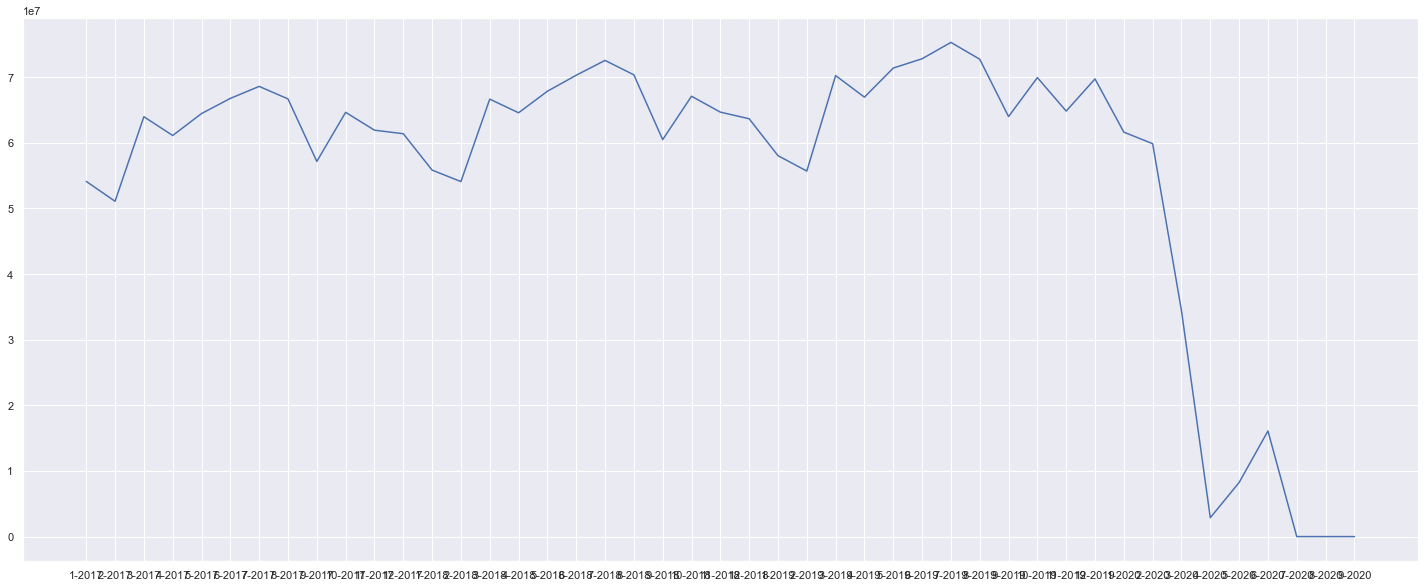

<Figure size 1800x360 with 0 Axes>

In [139]:
plt.plot(air_transport_recent["airline_domestic"])
plt.figure(figsize=(25, 5))
plt.show()

Next I want to add the CO2 data to confirm that it is correlated 


this whole process would also be good to do with driving data as well